In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

In [2]:
seed = 42

In [98]:
age = pd.read_excel("Ages.xlsx", skiprows = 6)
sex = pd.read_excel("Sex.xlsx", skiprows = 6)
interests = pd.read_excel("Interests.xlsx", skiprows = 6)
pages = pd.read_excel("PagesTranslated.xlsx", skiprows = 0)
places = pd.read_excel("Places.xlsx", skiprows = 6)
requests = pd.read_excel("Requests.xlsx", skiprows = 6)
sber = pd.read_excel("Sber.xlsx")

In [4]:
pages['Количество мужчин'] = pages['Визиты'] * pages['Доля мужчин']
pages['Количество женщин'] = pages['Визиты'] * pages['Доля женщин']
pages['Количество до 18'] = pages['Менее 18 лет'] * pages['Визиты']
pages['Количество 18-24'] = pages['18‑24 лет'] * pages['Визиты']
pages['Количество 25-34'] = pages['25‑34 лет'] * pages['Визиты']
pages['Количество 35-44'] = pages['35‑45 лет'] * pages['Визиты']
pages['Количество 45-55'] = pages['45‑55 лет'] * pages['Визиты']

In [5]:
#x_columns = ['Количество мужчин', 'Количество женщин', 'Количество до 18', 'Количество 18-24', 'Количество 25-34', 'Количество 35-44', 'Количество 45-55']
x_columns = ['Доля мужчин', 'Доля женщин', 'Менее 18 лет', '18‑24 лет', '25‑34 лет', '35‑45 лет', '45‑55 лет']

In [166]:
def get_color(c):
    if c == 0:
        return "green"
    elif c == 1:
        return "blue"
    elif c == 2:
        return "red"
    elif c == 3:
        return "yellow"
    elif c == 4:
        return "pink"
    elif c == 9:
        return "cyan"
    else:
        return "black"

In [7]:
def plot(n, x, y, title = None):

    #for i, txt in enumerate(n):
        #ax.annotate(txt, (compressed_x[i][0], compressed_x[i][0]), color=get_color(y_pred[i]))
    plt.figure(figsize=(12, 12))
    plt.title(title)
    plt.scatter(x[:, 0], x[:, 1], color = [get_color(y[i]) for i in range(len(n))])
    plt.show()

In [8]:
def plot_subplots(n, x, y, columns, name):

    fig, axes = plt.subplots(x.shape[1] - 1, x.shape[1] - 1)
    fig.set_size_inches(49, 49)

    for i in range(x.shape[1]):
        for j in range(i + 1, x.shape[1]):

            title =  columns[i] + " — " + columns[j]
            axes[i][j - 1].set_title(title)

            x_ = np.vstack([x[:, i], x[:, j]]).T
            axes[i][j - 1].scatter(x_[:, 0], x_[:, 1], color = [get_color(y[i]) for i in range(len(n))])

    plt.savefig(name)

DATA

In [9]:
x = pages[x_columns].to_numpy()

CLUSTERIZATION

In [10]:
n_clusters = 3
cls = SpectralClustering(n_clusters=n_clusters, n_init=10, random_state = seed)
labels = cls.fit_predict(x)


print(len(labels))
for cluster in range(n_clusters):
    print(f"{cluster + 1}:", len(labels[labels == cluster]))

5582
1: 2479
2: 1031
3: 2072


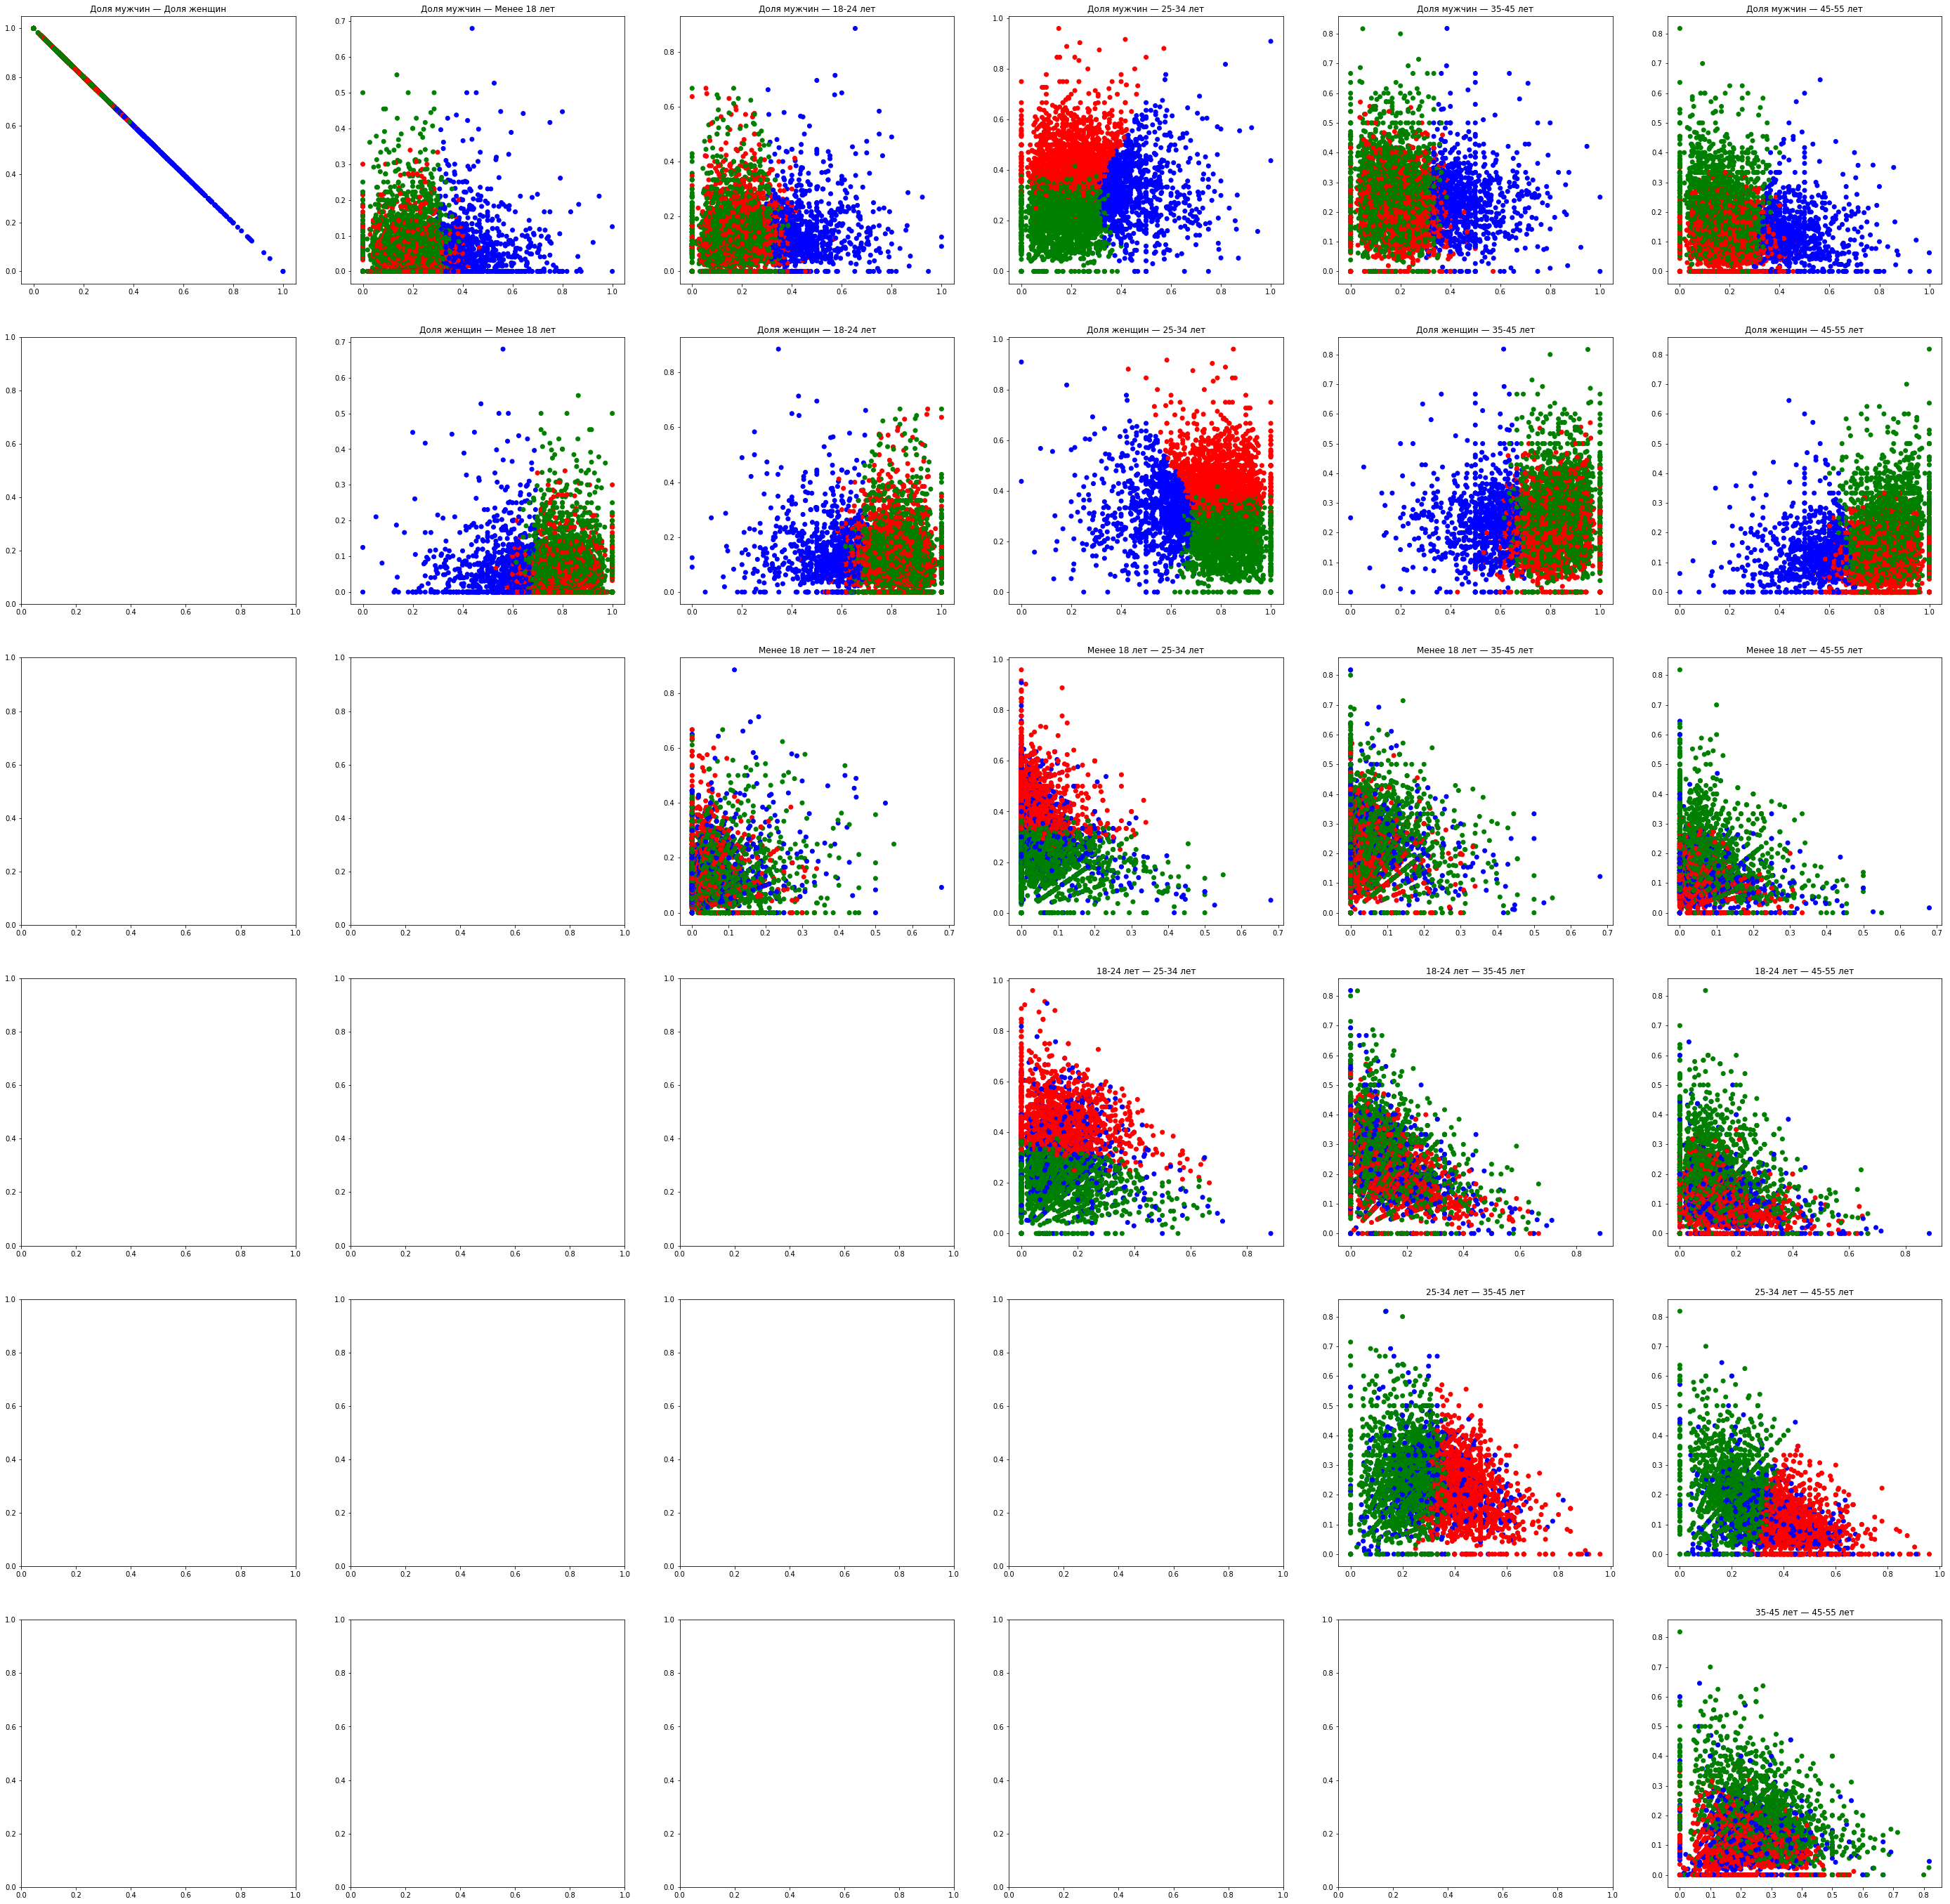

In [11]:
plot_subplots(pages['Перевод'], x, labels, x_columns, "Clusters" + str(n_clusters) + ".png")

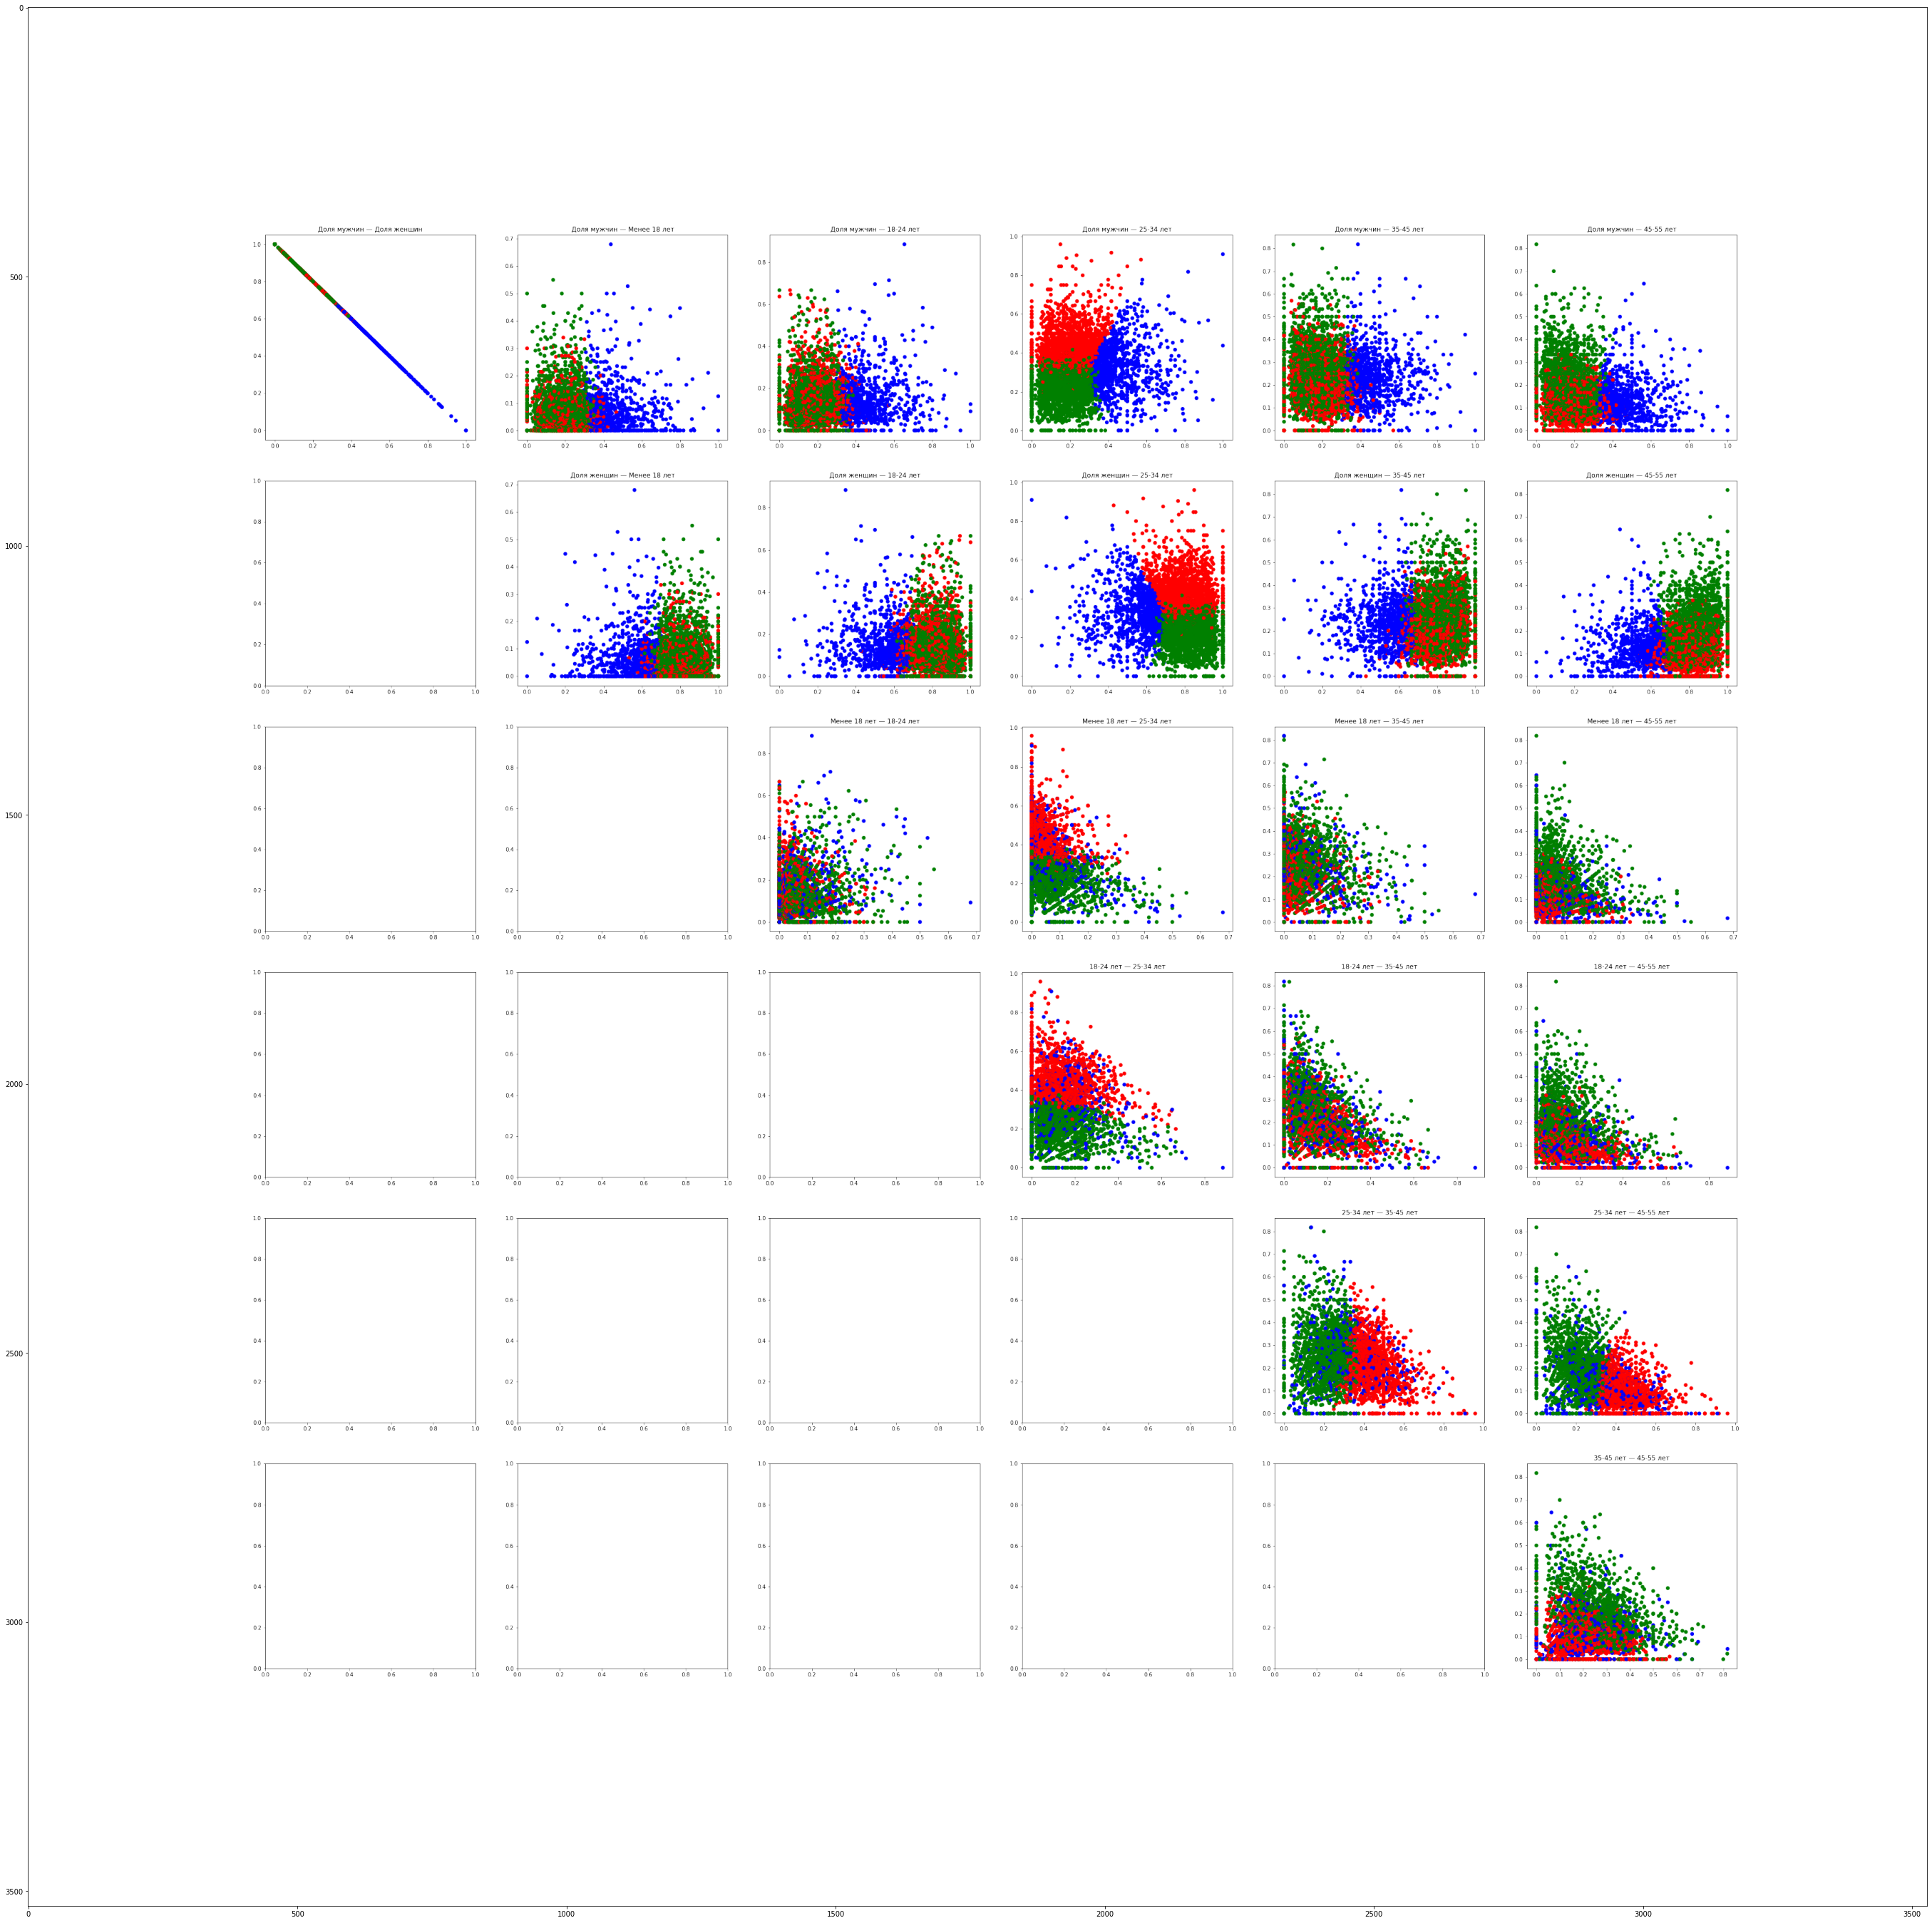

In [12]:
img = mpimg.imread('Clusters' + str(n_clusters) + '.png')
plt.figure(figsize = (49, 49))
plt.imshow(img)

In [ ]:
for i in range(x.shape[1]):
    for j in range(i + 1, x.shape[1]):
        plot(pages['Перевод'], np.vstack([x[:, i], x[:, j]]).T, labels, 
             title = x_columns[i] + " — " + x_columns[j])

FIND CENTERS

In [38]:
from sklearn.metrics import pairwise_distances

In [23]:
aff_matrix = cls.affinity_matrix_

In [26]:
pages.columns

Index(['Страница входа', 'Визиты', 'Посетители', 'Доля мужчин', 'Доля женщин',
       'Менее 18 лет', '18‑24 лет', '25‑34 лет', '35‑45 лет', '45‑55 лет',
       'Более 55 лет', 'Запрос', 'Перевод', 'Количество мужчин',
       'Количество женщин', 'Количество до 18', 'Количество 18-24',
       'Количество 25-34', 'Количество 35-44', 'Количество 45-55'],
      dtype='object')

In [29]:
test_data = pages[['Доля мужчин', '25‑34 лет']].to_numpy()

classes = [test_data[labels == cls] for cls in range(n_clusters)]

real_indexes = [pages[labels == cls].index for cls in range(n_clusters)]

nearest_classes = []

for cls in classes:
    
    cls_dist = pairwise_distances(cls)
    #print(cls_dist.shape)
    min_ind = np.argsort(np.sum(cls_dist, axis = 0))
    #print(np.argsort(min_ind).shape)
    center_ind = min_ind[0]
    objects = cls_dist[center_ind, :]
    nearest_objects = np.argsort(objects)
    
    assert(nearest_objects[0] == center_ind)
    
    nearest_classes.append(nearest_objects)

n_objects = 50

with open("Женщины 25-34 лет.txt", "w+") as file:
    for i, cls in enumerate(nearest_classes):

        if (i == 2):
            print(f"Тема {i} класстера:")
            for ind in range(0, min(n_objects, len(cls))):
                index = cls[ind]
                #file.write("Доля женщин: " + str(1 - classes[i][index, 0]) + "\n")
                #file.write("25-34 лет: " + str(classes[i][index, 1]) + "\n")
                if (pages.iloc[real_indexes[i][index]]['Перевод'] != "nan"):
                    file.write(str(pages.iloc[real_indexes[i][index]]['Перевод']) + "\n")
                #file.write("\n")

In [97]:
test_data = pages[['Доля мужчин', '25‑34 лет']].to_numpy()

classes = [test_data[labels == cls] for cls in range(n_clusters)]

real_indexes = [pages[labels == cls].index for cls in range(n_clusters)]

nearest_classes = []

for cls in classes:
    
    cls_dist = pairwise_distances(cls)
    #print(cls_dist.shape)
    min_ind = np.argsort(np.sum(cls_dist, axis = 0))
    #print(np.argsort(min_ind).shape)
    center_ind = min_ind[0]
    objects = cls_dist[center_ind, :]
    nearest_objects = np.argsort(objects)
    
    assert(nearest_objects[0] == center_ind)
    
    nearest_classes.append(nearest_objects)

n_objects = 100


for i, cls in enumerate(nearest_classes):

        if i == 1:
            print(f"Тема {i} класстера:")
            for ind in range(0, min(n_objects, len(cls))):
                index = cls[ind]
                print("Доля мужчин: " + str(classes[i][index, 0]) + "\n")
                print("25-34 лет: " + str(classes[i][index, 1]) + "\n")
                print(str(pages.iloc[real_indexes[i][index]]['Перевод']) + "\n")
                #file.write("\n")

"""with open("Женщины 25-34 лет.txt", "w+") as file:
    for i, cls in enumerate(nearest_classes):

        if (i == 2):
            print(f"Тема {i} класстера:")
            for ind in range(0, min(n_objects, len(cls))):
                index = cls[ind]
                #file.write("Доля женщин: " + str(1 - classes[i][index, 0]) + "\n")
                #file.write("25-34 лет: " + str(classes[i][index, 1]) + "\n")
                if (pages.iloc[real_indexes[i][index]]['Перевод'] != "nan"):
                    file.write(str(pages.iloc[real_indexes[i][index]]['Перевод']) + "\n")
                #file.write("\n")
"""                

Тема 1 класстера:
Доля мужчин: 0.4140625

25-34 лет: 0.3181818181818182

Фестиваль Робостарт

Доля мужчин: 0.4130434782608695

25-34 лет: 0.3125

Прохоровка

Доля мужчин: 0.4168096054888508

25-34 лет: 0.310880829015544

памятник самолет в волоконовке

Доля мужчин: 0.4020245842371656

25-34 лет: 0.3221523410202656

животные белгородской области

Доля мужчин: 0.4285714285714285

25-34 лет: 0.3157894736842105

nan

Доля мужчин: 0.4011516314779271

25-34 лет: 0.3258003766478342

nan

Доля мужчин: 0.4166666666666667

25-34 лет: 0.3333333333333333

nan

Доля мужчин: 0.4166666666666667

25-34 лет: 0.3333333333333333

nan

Доля мужчин: 0.4074074074074074

25-34 лет: 0.3333333333333333

nan

Доля мужчин: 0.4285714285714285

25-34 лет: 0.3076923076923077

nan

Доля мужчин: 0.4042553191489361

25-34 лет: 0.3333333333333333

nan

Доля мужчин: 0.4

25-34 лет: 0.3043478260869565

nan

Доля мужчин: 0.4333333333333333

25-34 лет: 0.3225806451612903

концерт тони раута и гарри топора

Доля мужчин: 0.3

'with open("Женщины 25-34 лет.txt", "w+") as file:\n    for i, cls in enumerate(nearest_classes):\n\n        if (i == 2):\n            print(f"Тема {i} класстера:")\n            for ind in range(0, min(n_objects, len(cls))):\n                index = cls[ind]\n                #file.write("Доля женщин: " + str(1 - classes[i][index, 0]) + "\n")\n                #file.write("25-34 лет: " + str(classes[i][index, 1]) + "\n")\n                if (pages.iloc[real_indexes[i][index]][\'Перевод\'] != "nan"):\n                    file.write(str(pages.iloc[real_indexes[i][index]][\'Перевод\']) + "\n")\n                #file.write("\n")\n'

In [108]:
def color_by_month(date):
    if date.month >=1 and date.month <= 3:
        return "blue"
    elif date.month >= 4 and date.month <= 6:
        return "yellow"
    elif date.month >= 7 and date.month <= 9:
        return "green"
    else:
        return "orange"

In [116]:
colors = ["blue", "yellow", "green", "orange"]

In [113]:
sex['Период'] = pd.to_datetime(sex['Период'])
sex['Color'] = [color_by_month(date) for date in sex['Период']]

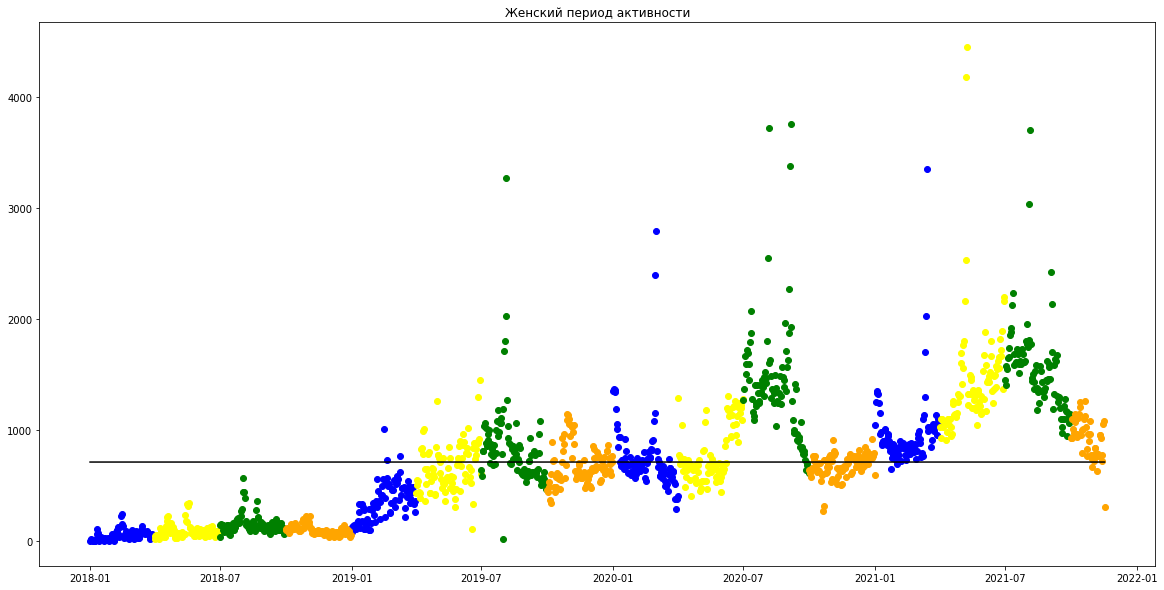

In [134]:
plt.figure(figsize = (20, 10))
for color in colors:
    df = sex[sex['Color'] == color]
    plt.scatter(df['Период'], df['женский'], color = color)
    
mean = sex['женский'].mean()
plt.plot(sex['Период'], [mean for i in range(len(sex))], color = "black")
plt.title("Женский период активности")
plt.savefig("Женский период активности.png")
plt.show()

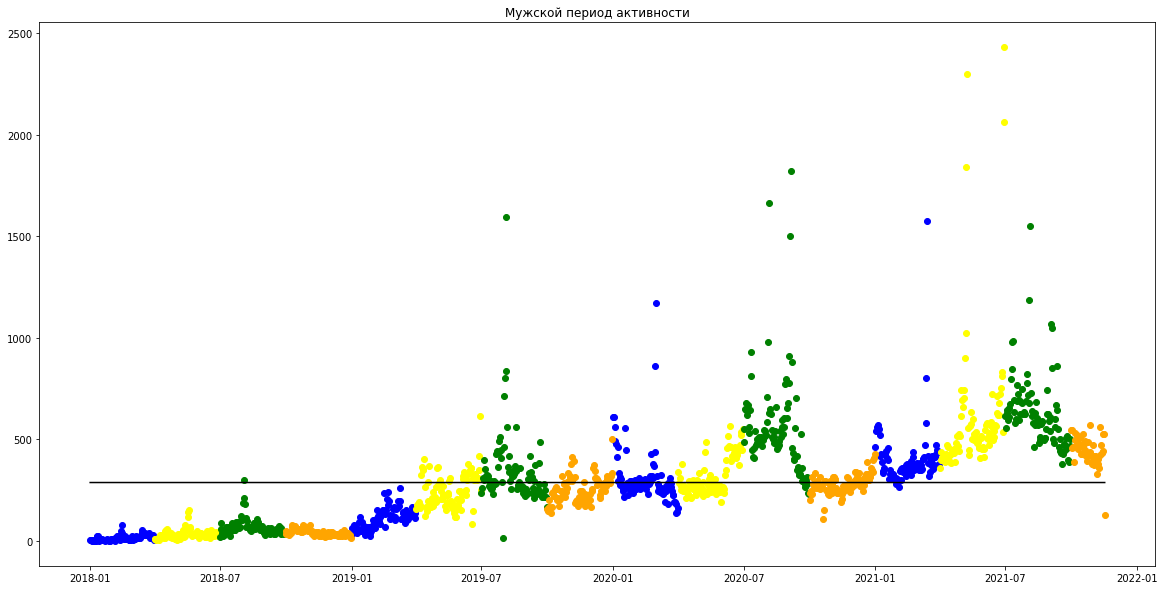

In [135]:
plt.figure(figsize = (20, 10))
for color in colors:
    df = sex[sex['Color'] == color]
    plt.scatter(df['Период'], df['мужской'], color = color)
    
mean = sex['мужской'].mean()
plt.plot(sex['Период'], [mean for i in range(len(sex))], color = "black")
plt.title("Мужской период активности")
plt.savefig("Мужской период активности.png")
plt.show()

In [144]:
age[age['Color'] == "blue"]

Период  младше 18 лет  18‑24 года  25‑34 года  35‑44 года  \
0    2018-01-01              1           1           3           3   
1    2018-01-02              3           2           9           9   
2    2018-01-03              0           1          10           5   
3    2018-01-04              0           2           5           2   
4    2018-01-05              0           0           0           0   
...         ...            ...         ...         ...         ...   
1181 2021-03-27             95         176         519         420   
1182 2021-03-28             87         172         475         360   
1183 2021-03-29             90         170         487         340   
1184 2021-03-30            110         173         479         387   
1185 2021-03-31            115         151         461         364   

      45-54 года Color  
0              3  blue  
1              1  blue  
2              0  blue  
3              1  blue  
4              1  blue  
...          ...   ...  
1181         166  blue  
1182         148  blue  
1183         181  blue  
1184         221  blue  
1185         181  blue  

[361 rows x 7 columns]

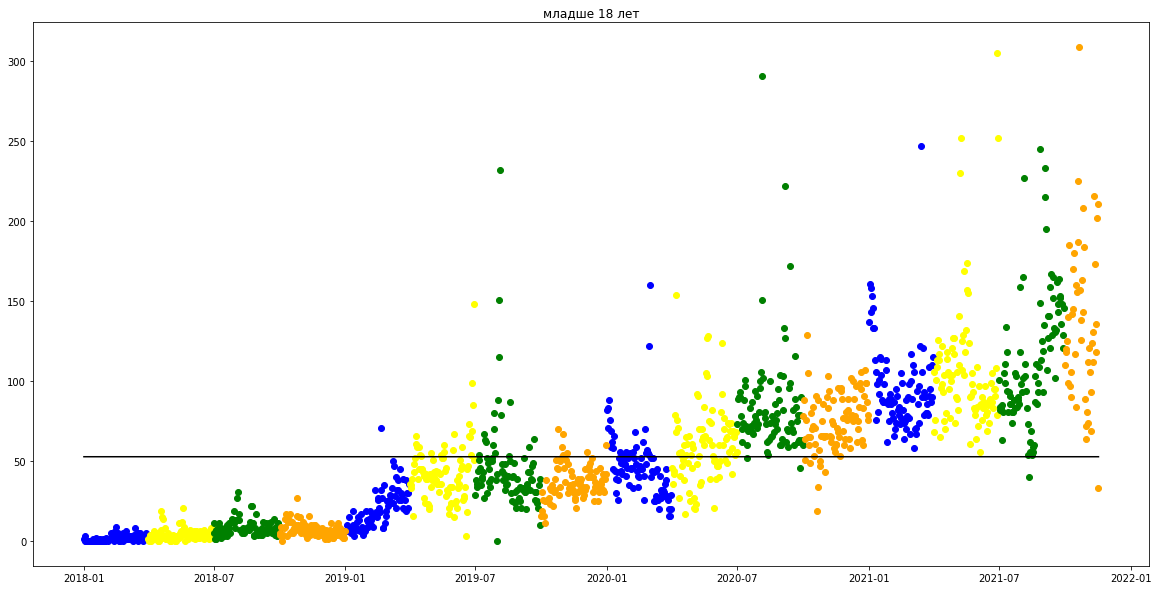

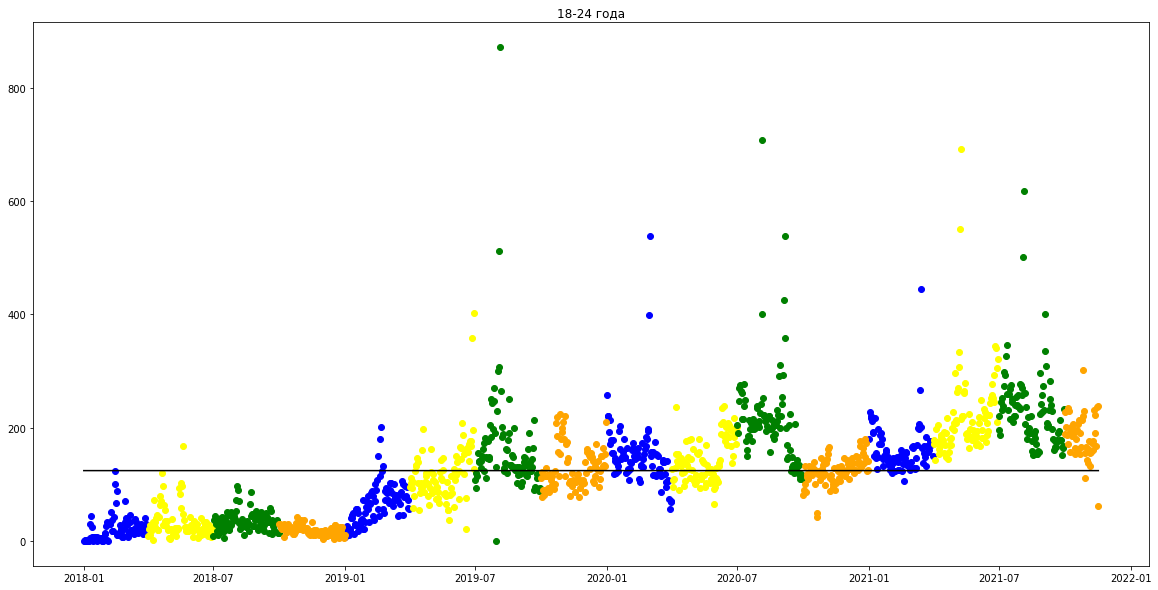

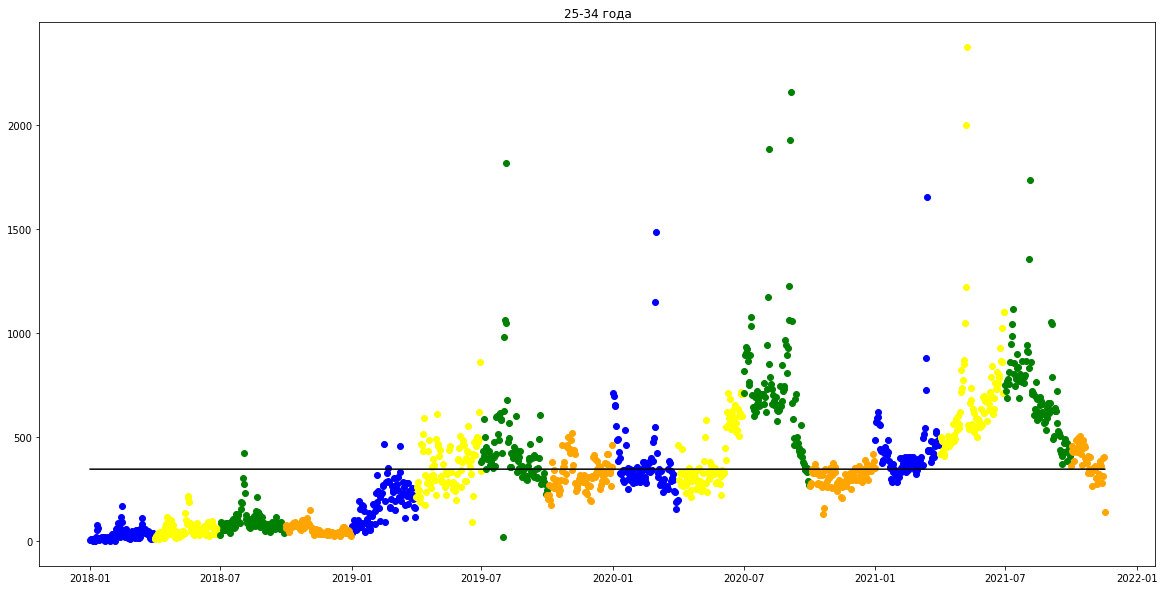

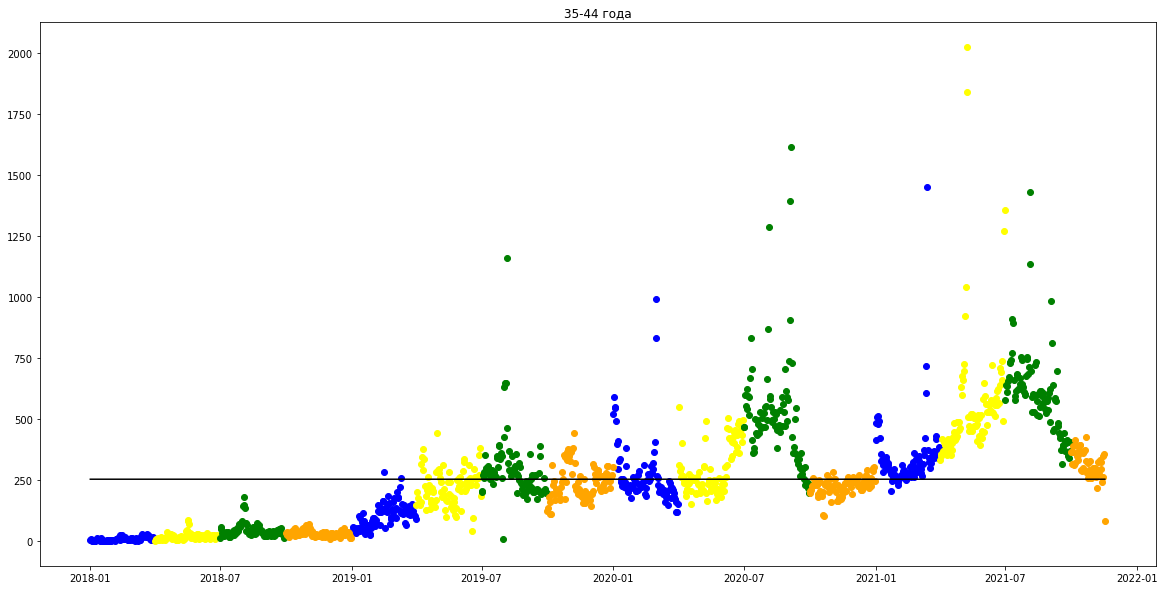

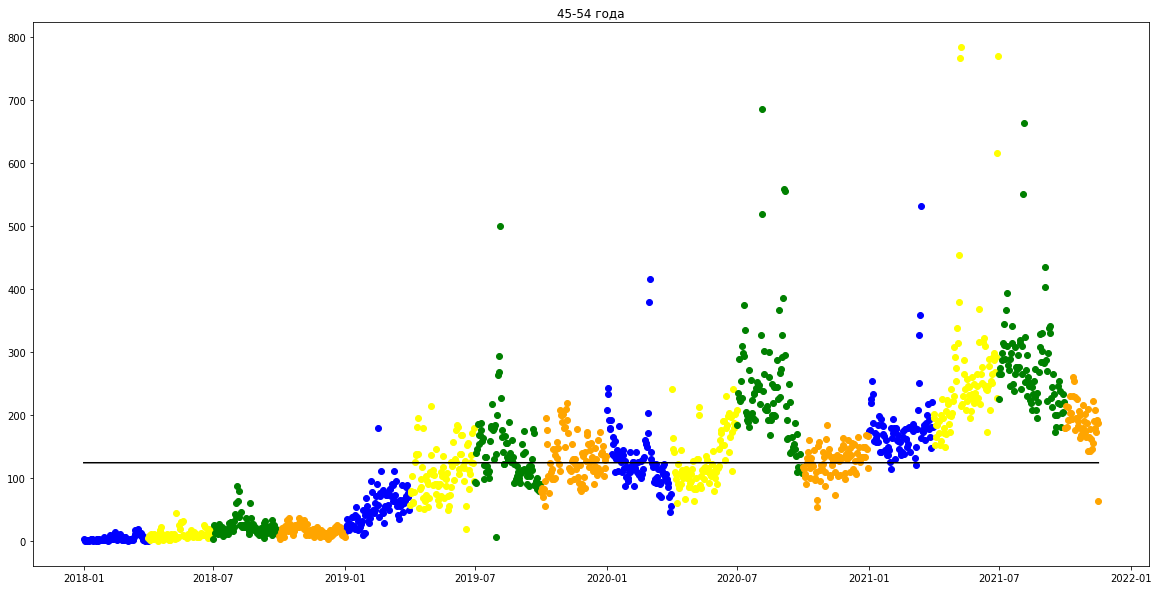

In [146]:
cols = ['младше 18 лет', '18‑24 года', '25‑34 года', '35‑44 года',
       '45-54 года']
age['Период'] = pd.to_datetime(age['Период'])
age['Color'] = [color_by_month(date) for date in age['Период']]

for col in cols:
    plt.figure(figsize = (20, 10))
    for color in colors:
        df = age[age['Color'] == color]
        plt.scatter(df['Период'], df[col], color = color)

    mean = age[col].mean()
    plt.plot(age['Период'], [mean for i in range(len(age))], color = "black")
    plt.title(col)
    plt.savefig(col + ".png")
    plt.show()

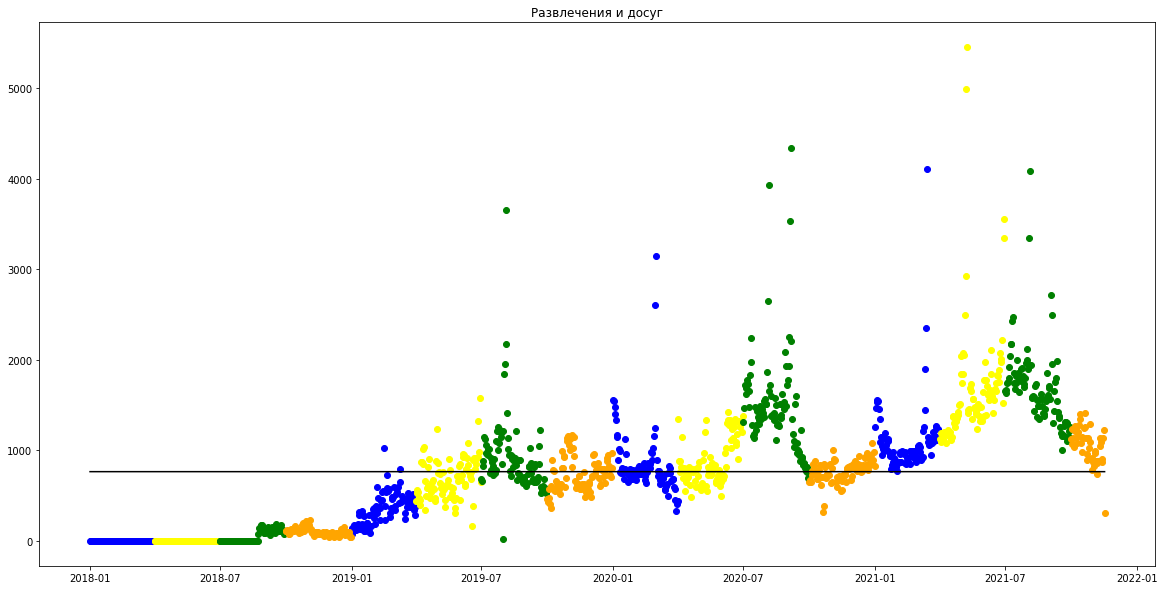

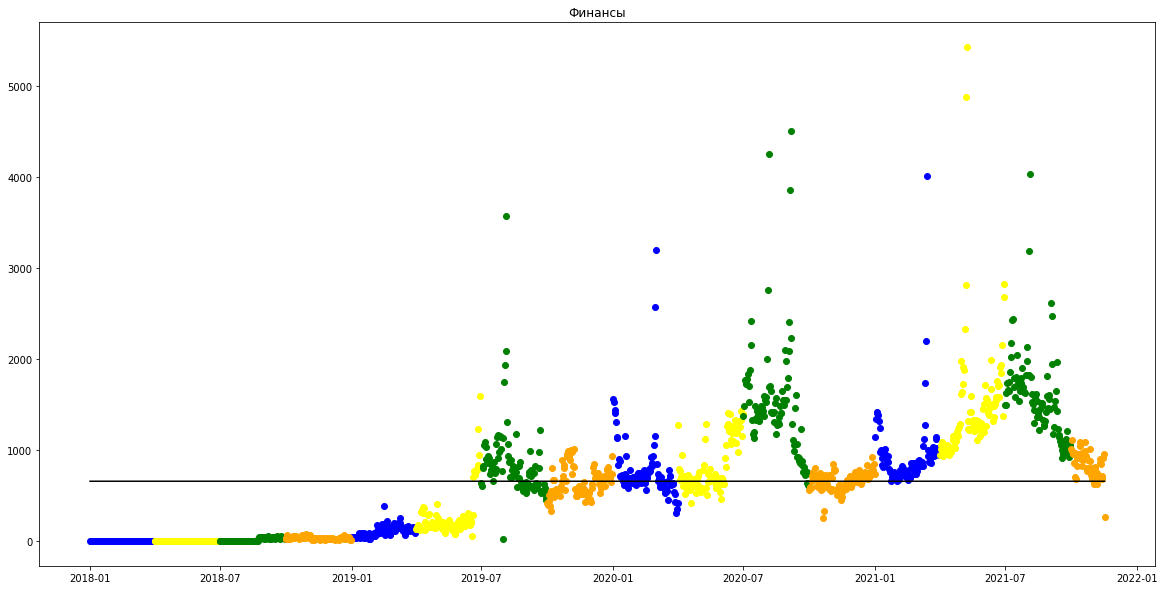

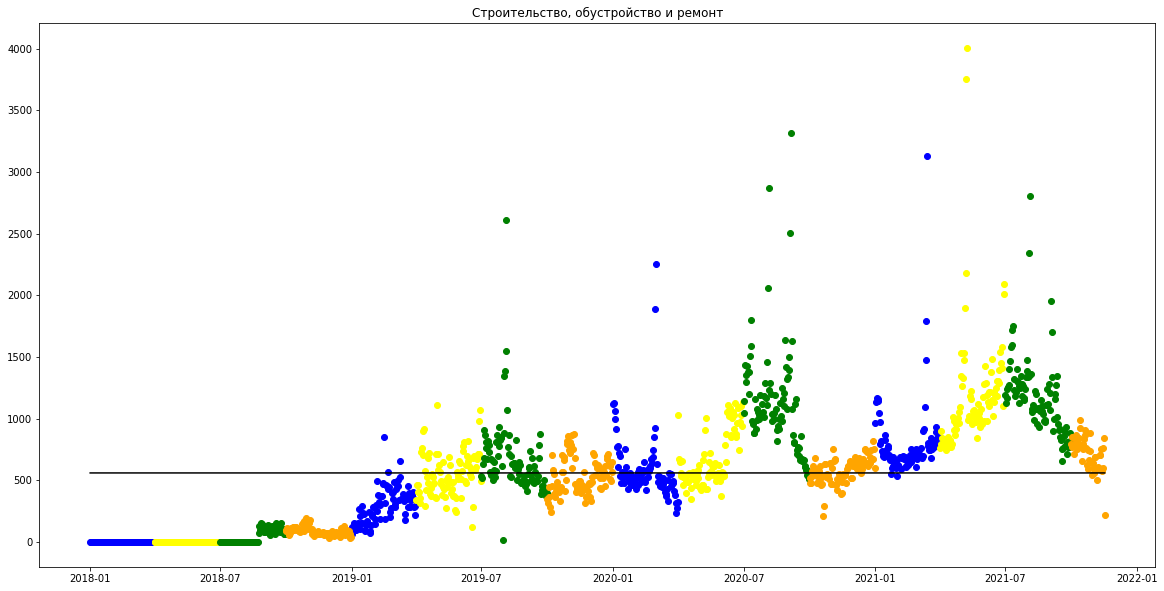

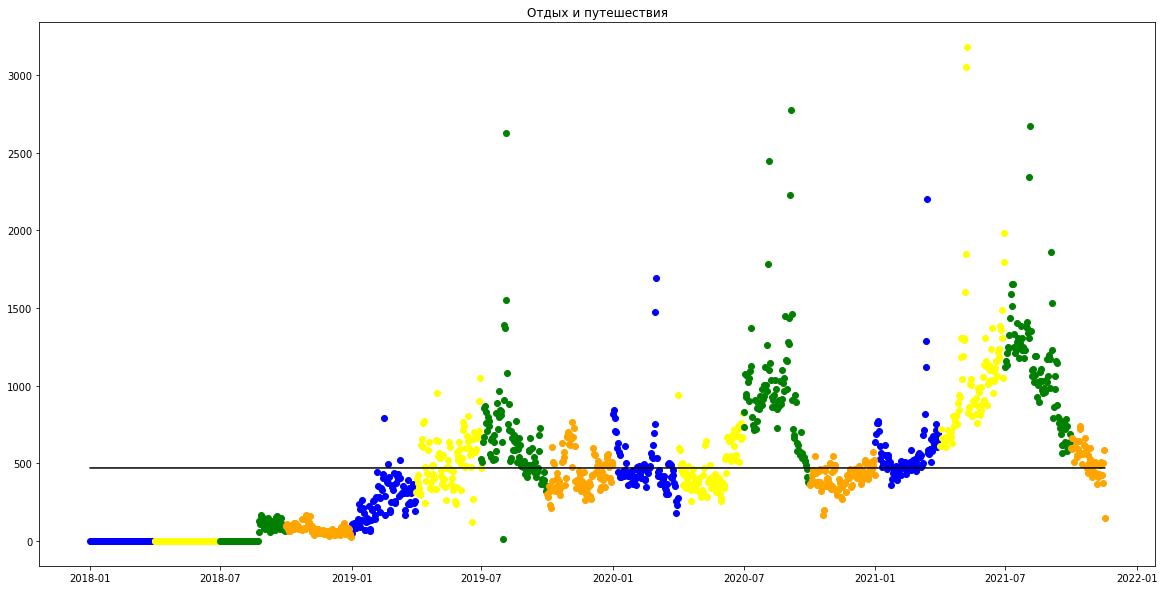

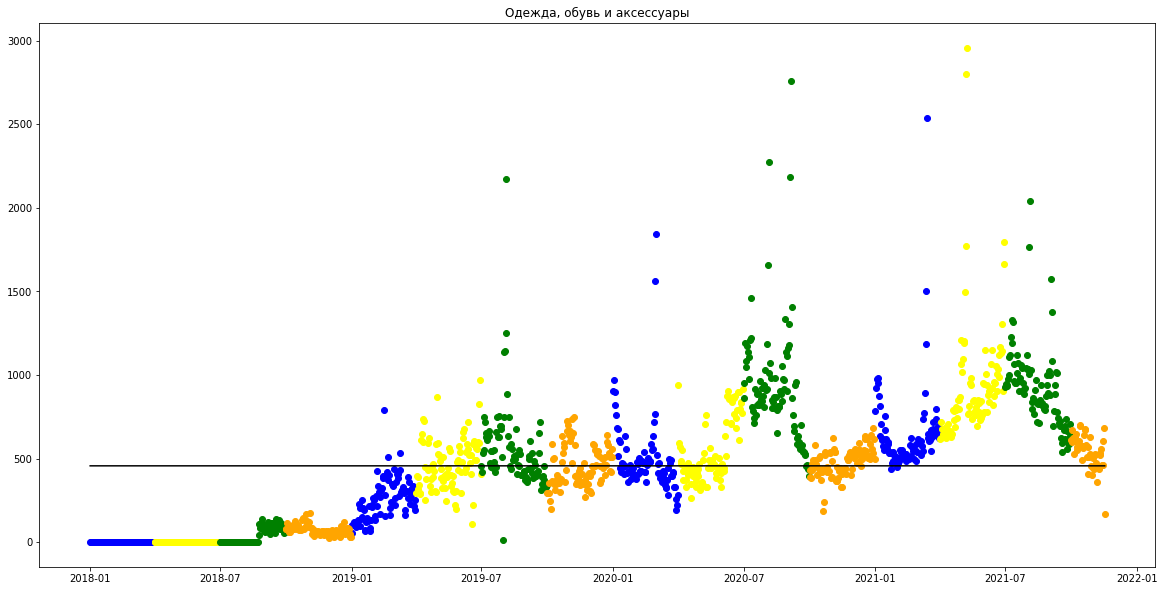

In [148]:
cols = ['Развлечения и досуг', 'Финансы',
       'Строительство, обустройство и ремонт', 'Отдых и путешествия',
       'Одежда, обувь и аксессуары']

interests['Период'] = pd.to_datetime(interests['Период'])
interests['Color'] = [color_by_month(date) for date in interests['Период']]

for col in cols:
    plt.figure(figsize = (20, 10))
    for color in colors:
        df = interests[interests['Color'] == color]
        plt.scatter(df['Период'], df[col], color = color)

    mean = interests[col].mean()
    plt.plot(interests['Период'], [mean for i in range(len(interests))], color = "black")
    plt.title(col)
    plt.savefig(col + ".png")
    plt.show()

In [151]:
sber.columns

Index(['Флаг. Детализация по году или кварталу',
       'Дата. Последний день периода согласно типу',
       'Флаг. Детализация по региону прибытия',
       'Регион прибытия (куда приехали)',
       'Флаг. Детализация по домашнему региону',
       'Домашний регион (откуда приехали)',
       'Кол-во уникальных туристов (чел.)', 'Сумма по транзакциям (руб.)',
       'Пользование автомобилем (чел.)',
       'Пользование общественным транспортом (чел.)',
       'Сумма снятия наличных денег во время поездки и в течение одного дня до поездки (руб.)',
       'Количество поездок (шт.)', 'Оборот (руб.)'],
      dtype='object')

In [174]:
x_columns = ['Кол-во уникальных туристов (чел.)','Оборот (руб.)']
x = sber[x_columns].to_numpy()

n_clusters = 10
cls = KMeans(n_clusters=n_clusters, n_init=10, random_state = seed)
labels = cls.fit_predict(x)


print(len(labels))
for cluster in range(n_clusters):
    print(f"{cluster + 1}:", len(labels[labels == cluster]))

3265
1: 300
2: 3
3: 8
4: 31
5: 2804
6: 15
7: 4
8: 33
9: 1
10: 66


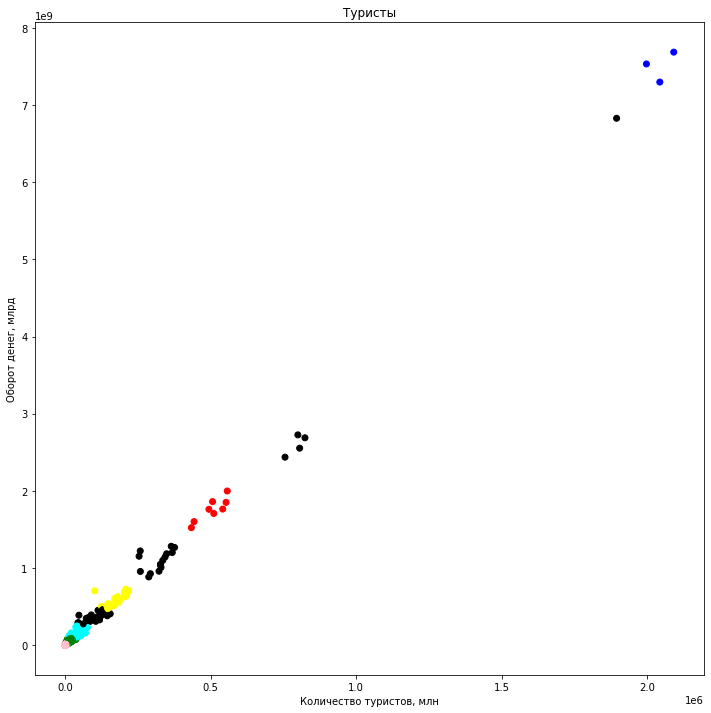

In [214]:
plt.figure(figsize=(12, 12))
plt.title("Туристы")
plt.xlabel('Количество туристов, млн')
plt.ylabel('Оборот денег, млрд')
plt.scatter(x[:, 0], x[:, 1], color = [get_color(labels[i]) for i in range(x.shape[0])])
plt.savefig("Туристы.png")
plt.show()

In [229]:
sber['Div'] = sber['Оборот (руб.)'] / sber['Кол-во уникальных туристов (чел.)']

In [236]:
print_data = sber[labels == 7]
print_data = print_data.sort_values('Div', ascending = False)
for index, data in print_data.iterrows():
    print(data['Домашний регион (откуда приехали)'], ":  ",data['Оборот (руб.)'] / data['Кол-во уникальных туристов (чел.)'], " руб.")

Все другие страны :   8116.000146336364  руб.
Все другие страны :   6549.585499750465  руб.
Все другие страны :   6298.013711369191  руб.
Ханты-Мансийский автономный округ :   4755.2160301163585  руб.
Ханты-Мансийский автономный округ :   4420.29854473435  руб.
Москва :   4415.1594012857  руб.
Москва :   4335.22367621216  руб.
Москва :   4331.423545367871  руб.
Москва :   4289.493562175658  руб.
Москва :   4102.270067676586  руб.
Московская область :   3980.956039397737  руб.
Санкт-Петербург :   3751.7320651242503  руб.
Санкт-Петербург :   3590.7222261170314  руб.
Все туристы :   3562.7184501387405  руб.
Все регионы :   3458.434150167566  руб.
Ульяновская область :   3297.948077856257  руб.
Все туристы :   3296.8749726544584  руб.
Все туристы :   3283.2471386180587  руб.
Все регионы :   3247.1160293235016  руб.
Все туристы :   3217.182071012851  руб.
Все регионы :   3191.6910592500935  руб.
Все туристы :   3190.617184608897  руб.
Все туристы :   3159.368032318974  руб.
Ульяновская обла

In [249]:
places['Время на сайте']

0      2021-11-19 00:01:37
1      2021-11-19 00:02:09
2      2021-11-19 00:01:22
3      2021-11-19 00:01:30
4      2021-11-19 00:01:35
               ...        
1157   2021-11-19 00:05:13
1158   2021-11-19 00:00:35
1159   2021-11-19 00:00:10
1160   2021-11-19 00:00:05
1161   2021-11-19 00:00:06
Name: Время на сайте, Length: 1162, dtype: datetime64[ns]

In [259]:
places['Время на сайте'] = pd.to_datetime(places['Время на сайте'])
places['Time'] = 0

arr = []
for index, row in places.iterrows():
    arr.append(row['Время на сайте'].second + row['Время на сайте'].minute * 60)
    
places['Time'] = arr

In [260]:
places

Страна                      Область          Город   Визиты  \
0     Итого и средние                          NaN            NaN  1938784   
1              Россия         Белгородская область       Белгород   596344   
2              Россия  Москва и Московская область         Москва   452323   
3              Россия                Не определено  Не определено   381393   
4              Россия         Белгородская область   Старый Оскол    55713   
...               ...                          ...            ...      ...   
1157          Украина            Луганская область     Суходольск       10   
1158          Украина         Николаевская область   Южноукраинск       10   
1159          Украина          Хмельницкая область  Не определено       10   
1160          Украина          Хмельницкая область       Красилов       10   
1161          Украина          Черновицкая область  Не определено       10   

      Посетители    Отказы  Глубина просмотра      Время на сайте  Time  
0        1189271  0.173574           1.490286 2021-11-19 00:01:37    97  
1         320585  0.141071           1.759580 2021-11-19 00:02:09   129  
2         311974  0.162368           1.374505 2021-11-19 00:01:22    82  
3         256093  0.163928           1.380699 2021-11-19 00:01:30    90  
4          39609  0.157755           1.430510 2021-11-19 00:01:35    95  
...          ...       ...                ...                 ...   ...  
1157          10  0.100000           1.300000 2021-11-19 00:05:13   313  
1158          10  0.100000           1.200000 2021-11-19 00:00:35    35  
1159          10  0.200000           1.100000 2021-11-19 00:00:10    10  
1160          10  0.500000           1.000000 2021-11-19 00:00:05     5  
1161          10  0.500000           1.100000 2021-11-19 00:00:06     6  

[1162 rows x 9 columns]

In [264]:
x_columns = ['Time', 'Отказы']
x = places[x_columns].to_numpy()

n_clusters = 4
cls = KMeans(n_clusters=n_clusters, n_init=10, random_state = seed)
labels = cls.fit_predict(x)


print(len(labels))
for cluster in range(n_clusters):
    print(f"{cluster + 1}:", len(labels[labels == cluster]))

1162
1: 45
2: 446
3: 438
4: 233


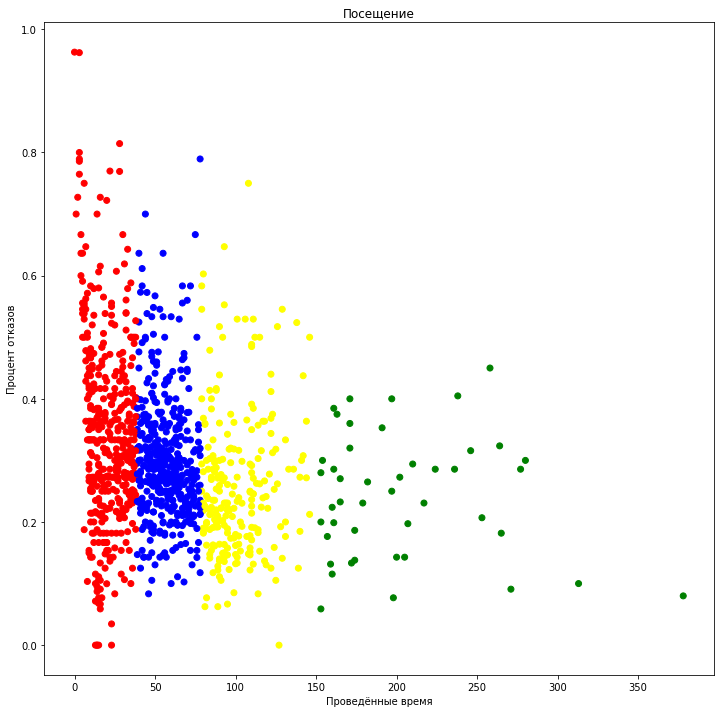

In [265]:
plt.figure(figsize=(12, 12))
plt.title("Посещение")
plt.xlabel('Проведённые время')
plt.ylabel('Процент отказов')
plt.scatter(x[:, 0], x[:, 1], color = [get_color(labels[i]) for i in range(x.shape[0])])
plt.savefig("Посещение.png")
plt.show()

In [ ]:
red = 2
green = 0

In [279]:
n_comp = 10
labl = 0


elems = places[labels == labl].sort_values('Time')
for i in range(n_comp):
    print(str(elems.iloc[i]['Область']), ": ", str(elems.iloc[i]['Time']))

Нижегородская область :  153
Свободное государство Саксония :  153
Липецкая область :  153
Штат Массачусетс :  154
Республика Башкортостан :  157
Свердловская область :  159
Эмират Дубай :  160
Мурманская область :  160
Варсинайс-Суоми :  161
Орловская область :  161


In [268]:
places

Страна                      Область          Город   Визиты  \
0     Итого и средние                          NaN            NaN  1938784   
1              Россия         Белгородская область       Белгород   596344   
2              Россия  Москва и Московская область         Москва   452323   
3              Россия                Не определено  Не определено   381393   
4              Россия         Белгородская область   Старый Оскол    55713   
...               ...                          ...            ...      ...   
1157          Украина            Луганская область     Суходольск       10   
1158          Украина         Николаевская область   Южноукраинск       10   
1159          Украина          Хмельницкая область  Не определено       10   
1160          Украина          Хмельницкая область       Красилов       10   
1161          Украина          Черновицкая область  Не определено       10   

      Посетители    Отказы  Глубина просмотра      Время на сайте  Time  
0        1189271  0.173574           1.490286 2021-11-19 00:01:37    97  
1         320585  0.141071           1.759580 2021-11-19 00:02:09   129  
2         311974  0.162368           1.374505 2021-11-19 00:01:22    82  
3         256093  0.163928           1.380699 2021-11-19 00:01:30    90  
4          39609  0.157755           1.430510 2021-11-19 00:01:35    95  
...          ...       ...                ...                 ...   ...  
1157          10  0.100000           1.300000 2021-11-19 00:05:13   313  
1158          10  0.100000           1.200000 2021-11-19 00:00:35    35  
1159          10  0.200000           1.100000 2021-11-19 00:00:10    10  
1160          10  0.500000           1.000000 2021-11-19 00:00:05     5  
1161          10  0.500000           1.100000 2021-11-19 00:00:06     6  

[1162 rows x 9 columns]